<a href="https://colab.research.google.com/github/HighKlown/Data-Driven-Models/blob/main/Generative_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.stats import norm
iris_dataset = load_iris()

In [ ]:
print(f"key of iris_dataset:\n {iris_dataset.keys()}")

key of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris_dataset['DESCR'][:900]+"\n...")#getting the first 900 characters

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:
...


In [ ]:
# Get the features and target
# 0: setosa, 1: verseicolor, 2: virginica
X = iris_dataset.data
y = iris_dataset.target
print(X[0], y[0])
print(X[55], y[55])
# Combine the features and target
data = np.column_stack([X, y])

# shuffle the data
np.random.shuffle(data)

data.shape
#Splitting the data
idx= int(0.8 * data.shape[0])

# take first 80% of data as training data
train = data[:idx]

# take last 20% of data as testing data
test = data[idx:]

# Extract the X_train, X_test, y_train, y_test
X_train = train[:,:-1]
y_train = train[:,-1]
X_test = test[:,:-1]
y_test = test[:,-1]

[5.1 3.5 1.4 0.2] 0
[5.7 2.8 4.5 1.3] 1


We want to take a look at the data before we use learning function at all

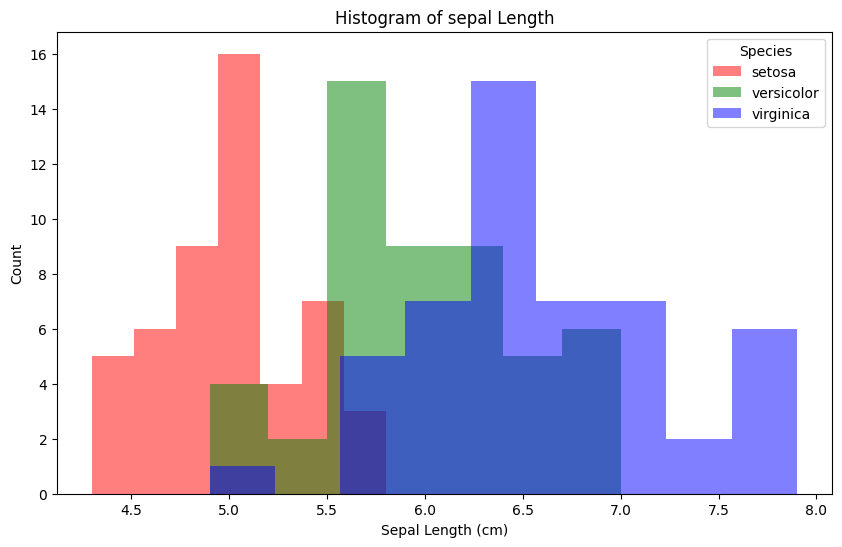

In [ ]:
# Seperate the data by species
species = np.unique(y_train)
data_by_species = [X[y == int(s)] for s in species]

# create a new figure
plt.figure(figsize=(10,6))

#Create and display a histogram for each species
colors = ['red', 'green' ,'blue']
species_names = iris_dataset.target_names
for i, data in enumerate(data_by_species):
  sns.histplot(data[:, 0], kde=False, edgecolor=None, linewidth=0, color=colors[i], alpha=0.5, label=species_names[i])
plt.title('Histogram of sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Count')
plt.legend(title='Species')
plt.show()

In [ ]:
#sp_length = np.c_[X_train[ : 0], y_train].

sp_length = np.c_[X_train[:, 0], y_train]
sp_prior = [np.mean(y_train == float(x)) for x in range(3)]

setosa = sp_length[sp_length[:, 1] == 0] #boolean indexing
sp_mean = [np.mean(sp_length[sp_length[:, 1] == float(x)], axis=0)[0] for x in range(3)] #finding mean of all

sp_variance = [np.var(sp_length[sp_length[:, 1] == float(x)] , axis=0)[0] for x in range(3)]

print(sp_prior)
print(sp_mean)
print(sp_variance)

[0.35833333333333334, 0.3333333333333333, 0.30833333333333335]
[5.020930232558141, 5.95, 6.5486486486486495]
[0.12723634396971345, 0.2575, 0.4100657414170929]


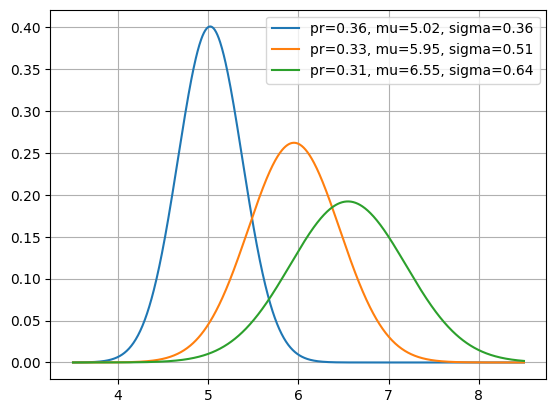

In [ ]:
#Generate range of x-values
x = np.linspace(3.5, 8.5, 1000)

y = [sp_prior[i]*norm.pdf(x, sp_mean[i], np.sqrt(sp_variance[i])) for i in range(3)]

for i in range(len(y)) :
  plt.plot(x, y[i], label=f"pr={sp_prior[i]:.2f}, mu={sp_mean[i]:.2f}, sigma={np.sqrt(sp_variance[i]):.2f}")
plt.legend()
plt.grid(True)
plt.show()

To build a classifier, the max value of the computed probabilities is used.

\begin{align}
        \hat f(x)= \arg\max_{k\in y}\frac{p(Y)}{\sqrt{2\pi\hat\sigma^{2}_{k}}}\exp\bigl(-\frac{(x-\hat\mu_{k})^{2}}{2\hat\sigma^{2}_{k}}\bigr)
    \end{align}

\begin{align}
        \Rightarrow \ln({\frac{p(Y)}{\sqrt{2\pi\hat\sigma^{2}_{k}}}\exp\bigl(-\frac{(x-\hat\mu_{k})^{2}}{2\hat\sigma^{2}_{k}}\bigr)})
    \end{align}

\begin{align}
        \Rightarrow \ln{p(Y)}-\frac{1}{2}\ln2\pi-\frac{1}{2}\ln\hat\sigma^{2}_{k}-\frac{(x-\hat\mu_{k})^{2}}{2\hat\sigma^{2}_{k}}
    \end{align}

\begin{align}
        \Rightarrow \ln{p(Y)}-\frac{1}{2}\ln\hat\sigma^{2}_{k}-\frac{(x-\hat\mu_{k})^{2}}{2\hat\sigma^{2}_{k}}
    \end{align}

In [ ]:
def learning(X_train, y_train, num_classes = 3):
  return [(np.mean(y_train == k), np.mean(X_train[y_train == k]), np.var(X_train[y_train == k])) for k in range(num_classes)]

def predict(params, test_x):
  log_posterior = np.array([np.log(prior) - np.log(sigma2)/2 - (test_x-mu)**2 / (2*sigma2) for prior, mu, sigma2 in params])
  return np.argmax(log_posterior, axis=0)

In [ ]:
params = learning(X_train[:,0], y_train)
prediction = predict(params, X_test[:,0])

accuracy_test = np.mean(prediction == y_test)
print(accuracy_test)

0.7


<function matplotlib.pyplot.show(close=None, block=None)>

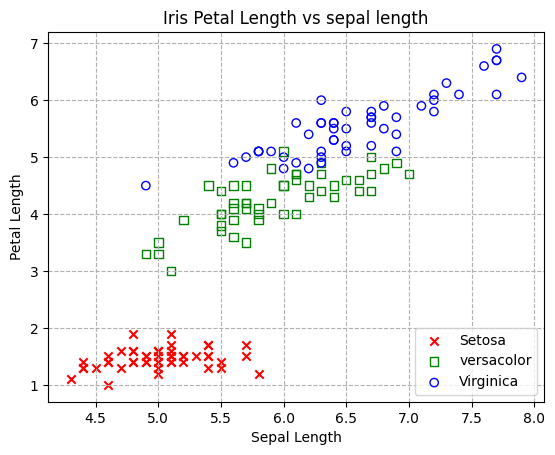

In [ ]:
#Convert dataset to databse
iris_df = pd.DataFrame(data = iris_dataset.data ,columns = iris_dataset.feature_names)

#Extract oetak abd sepal length
petal_length = iris_df['petal length (cm)']
sepal_length = iris_df['sepal length (cm)']

# Create labels
plt.scatter(sepal_length[:50], petal_length[:50], marker='x', facecolors='r', label='Setosa')
plt.scatter(sepal_length[50:100], petal_length[50:100], marker='s', facecolors='none', edgecolors='g', label='versacolor')
plt.scatter(sepal_length[100:], petal_length[100:], marker='o', facecolors='none', edgecolors='b', label='Virginica')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris Petal Length vs sepal length')

plt.grid(True, linestyle='--')
plt.legend(loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

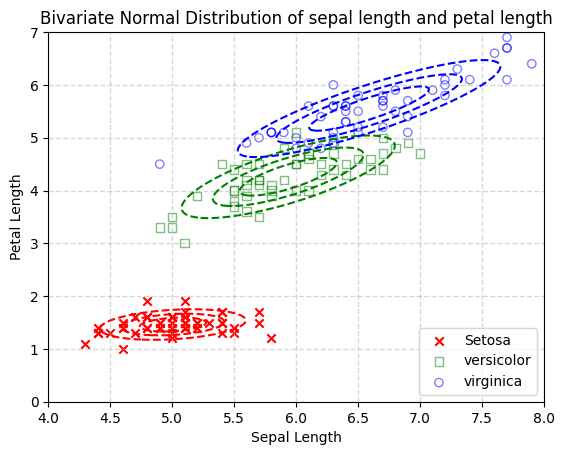

In [ ]:
setosa = iris_dataset.data[iris_dataset.target == 0]
versicolor = iris_dataset.data[iris_dataset.target == 1]
viginica = iris_dataset.data[iris_dataset.target == 2]

#Extract the sepal length and petal length columns for each species
setosa_sepal_length = setosa[:, 0]
setosa_petal_length = setosa[:, 2]

versicolor_sepal_length = versicolor[:, 0]
versicolor_petal_length = versicolor[:, 2]

virginica_sepal_length = viginica[:, 0]
virginica_petal_length = viginica[:, 2]

setosa_mean = np.array([setosa_sepal_length.mean(), setosa_petal_length.mean()])
setosa_cov = np.cov(setosa_sepal_length, setosa_petal_length)

versicolor_mean = np.array([versicolor_sepal_length.mean(), versicolor_petal_length.mean()])
versicolor_cov = np.cov(versicolor_sepal_length, versicolor_petal_length)

virginica_mean = np.array([virginica_sepal_length.mean(), virginica_petal_length.mean()])
virginica_cov = np.cov(virginica_sepal_length, virginica_petal_length)



x, y = np.meshgrid(np.linspace(4, 8, 1000), np.linspace(0, 7, 1000))

pos = np.dstack((x,y))

setosa_pdf = np.exp(-0.5*np.sum((pos - setosa_mean) @ np.linalg.inv(setosa_cov) * (pos - setosa_mean), axis=2))
versicolor_pdf = np.exp(-0.5*np.sum((pos - versicolor_mean) @ np.linalg.inv(versicolor_cov) * (pos - versicolor_mean), axis=2))
virginica_pdf = np.exp(-0.5*np.sum((pos - virginica_mean) @ np.linalg.inv(virginica_cov) * (pos - virginica_mean), axis=2))

setosa_contour = plt.contour(x ,y, setosa_pdf, colors='red', levels=3, linestyles='dashed')
versicolor_contour = plt.contour(x ,y, versicolor_pdf, colors='green', levels=3, linestyles='dashed')
viginica_contour = plt.contour(x ,y, virginica_pdf, colors='blue', levels=3, linestyles='dashed')

# Create labels

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Bivariate Normal Distribution of sepal length and petal length')

plt.scatter(setosa_sepal_length, setosa_petal_length, color='blue', label='Setosa', marker='x', facecolor='r')
plt.scatter(versicolor_sepal_length, versicolor_petal_length, color='orange', label='versicolor', alpha=0.5, marker='s', facecolor='none' , edgecolor='g')
plt.scatter(virginica_sepal_length, virginica_petal_length, color='green', label='virginica', alpha=0.5, marker='o', facecolor='none', edgecolor='b')

plt.legend(loc='lower right')
plt.gca().grid(True,linewidth=1, linestyle='--', alpha=0.5)
plt.show



\begin{align}
        \ln {p_{x_{1},x_{2}}(x_{1}, x_{2})} = ln(p(Y))-\frac{1}{2}ln(2\pi)-\frac{1}{2}ln(|\Sigma|)-\frac{1}{2}D^{2}
    \end{align}

\begin{align}
        \Rightarrow ln(p(Y))-\frac{1}{2}ln(|\Sigma|)-\frac{1}{2}D^{2}
    \end{align}

\begin{align}
        \Rightarrow ln(p(Y))-\frac{1}{2}ln(|\Sigma|)-\frac{1}{2}\begin{bmatrix}
        x_{1} - \mu_{1} \\
        x_{2} - \mu_{2}
        \end{bmatrix}^{T}\Sigma^{-1}
        \begin{bmatrix}
        x_{1} - \mu_{1} \\
        x_{2} - \mu_{2}
        \end{bmatrix}
    \end{align}


Predict(para, X_test)
X_test =[[1,2], [3,4], ... [1,7]]
sl = element[0]
pl = element[1]

In [ ]:
def learn_ver1(X_train, y_train, num_classes=3):
  """This function calculates and pairs the prior, means of the features, and
  covariance matrix based on both input and out of the training data.

  :param: This function takes in three arguments, `X_train` and `y_train` and
   number of classes. `X_train` is a list of features such as sepal length,
   width, and etc. 'y_train' is the list of correct species based on the
   features. Number of classes is the number of species.
  :return: This function returns 2-D list of prior, means of the features, and
  covariance matrix paired in a row.
  """

  param = []
  for i in range(num_classes):
    species = X_train[y_train == i]
    species_sl = species[:, 0] # sl: sepal length
    species_pl = species[:, 2] # pl: petal length

    # Calculate the prirors
    species_prior = np.mean(y_train == i)

    # Calculate the means of species_sl and species_pl
    species_sl_mean = np.mean(species_sl, axis=0)
    species_pl_mean = np.mean(species_pl, axis=0)

    # Calculate the covariance matrix
    sigma_11 = np.mean((species_sl - species_sl_mean) ** 2, axis=0)
    sigma_22 = np.mean((species_pl - species_pl_mean) ** 2, axis=0)
    sigma_12 = np.mean(((species_sl - species_sl_mean) * \
     (species_pl - species_pl_mean)), axis=0) # sigma_12: sigma_21
    sigma_21 = sigma_12
    sigma_cov = np.array([[sigma_11, sigma_12], [sigma_21, sigma_22]])

    # attaching prior, mean_sl, mean_pl, and covariance matrix in a list
    param.append((species_prior, species_sl_mean, species_pl_mean, sigma_cov))

  return param

def predict(param, X_test):

  """This function calculates max likelihood of the flower species based on
  given features.

  :param: This function takes in two arguments, `param` and `X_test`. `param` is
   a list of prior for species, mean features, and covarance matrix for those
   features. 'X_test' is the list of four features for flower species.

  :return: This function returns list of prediction of what the species of the
  flower is based on list of features from `X_test`. The prediction model is
  based on Naitve Bayes Model.
  """

  species_sl = X_test[:, 0]
  species_pl = X_test[:, 2]

  predictions = []
  # In this loop, x_sl will run on species_sl and x_pl will run on species_pl
  # simultaneously
  for x_sl, x_pl in zip(species_sl, species_pl):

    log_posterior = []

    # The param is consist of prior, sepal mean, petal mean, and covariance
    # matrix in each row. This for loop will run each of these rows
    for prior, mean_sl, mean_pl, cov in param:

      # Calculate vector difference
      diff_vec = np.array([[x_sl - mean_sl], [x_pl - mean_pl]])

      # Calculate transpose of vector difference
      trans_diff_vec = diff_vec.T

      # Calculate the inverse of covariance matrix
      inv_cov = np.linalg.inv(cov)

      # Calculate squared of mahalanobis distance
      D_squared = (trans_diff_vec @ inv_cov @ diff_vec).item()

      # Calculate the log posterior (left out any constant coefficients that
      # won't affect argmax result) and save results in a list
      log_posterior.append(np.log(prior) - 0.5*np.log(np.linalg.det(cov)) - \
                           0.5 * D_squared)

    # After running log posterior of one species, get argmax of the list in
    # log_posterior and add it to the prediction list
    predictions.append(np.argmax(np.array(log_posterior)))
  return np.array(predictions)

def error_rate(predict, y_test):
  """This function calculates the error rate of the 'predict' compared to
  `y_test`.

  :param: This function takes in two arguments, `predict` and `y_test`,
  `predict` is a list of 0, 1, 2, which represents specie names and 'y_test' is
  the correct list of species name for `X_test`.

  :return: This function returns error rate of `predict` when compared to
  `y_test`.
  """

  return 1-np.mean(predict == y_test)


param = learn_ver1(X_train, y_train, 3)
error_rate(predict(param, X_test), y_test)


0.06666666666666665


\begin{align}
        \ln {p_{X}(x)} = ln(p(Y))-\frac{d}{2}ln(2\pi)-\frac{1}{2}ln(|\Sigma|)-\frac{1}{2}D^{2}
    \end{align}


\begin{align}
        \Rightarrow ln(p(Y))-\frac{1}{2}ln(|\Sigma|)-\frac{1}{2}D^{2}
    \end{align}


\begin{align}
        \Rightarrow ln(p(Y))-\frac{1}{2}ln(|\Sigma|)-\frac{1}{2}\begin{bmatrix}
        x_{1} - \mu_{1} \\
        \vdots\\
        x_{k} - \mu_{k}
        \end{bmatrix}^{T}\Sigma^{-1}
        \begin{bmatrix}
        x_{1} - \mu_{1} \\
        \vdots\\
        x_{k} - \mu_{k}
        \end{bmatrix}
    \end{align}

d: dimension of the covariance matrix. Consider it as the number of features

k: total number of features

In [ ]:
def learn_ver1(X_train, y_train, num_classes=3):
  param = []
  for i in range(num_classes):
    species = X_train[y_train == i]
    species_sl = species[:, 0]#sl: sepal length
    species_sw = species[:, 1]
    species_pl = species[:, 2]#pl: petal length
    species_pw = species[:, 3]

    #Calculate the prirors
    species_prior = np.mean(y_train == i)

    #Calculate the means of species' features
    species_sl_mean = np.mean(species_sl, axis=0)
    species_sw_mean = np.mean(species_sw, axis=0)
    species_pl_mean = np.mean(species_pl, axis=0)
    species_pw_mean = np.mean(species_pw, axis=0)

    #Calculate the covariance matrix
    sigma_11 = np.mean((species_sl - species_sl_mean)**2, axis=0)
    sigma_12 = np.mean(((species_sl - species_sl_mean) * (species_sw - species_sw_mean)), axis=0)
    sigma_13 = np.mean(((species_sl - species_sl_mean) * (species_pl - species_pl_mean)), axis=0)
    sigma_14 = np.mean(((species_sl - species_sl_mean) * (species_pw - species_pw_mean)), axis=0)
    sigma_21 = sigma_12
    sigma_22 = np.mean((species_sw - species_sw_mean)**2, axis=0)
    sigma_23 = np.mean(((species_sw - species_sw_mean) * (species_pl - species_pl_mean)), axis=0)
    sigma_24 = np.mean(((species_sw - species_sw_mean) * (species_pw - species_pw_mean)), axis=0)
    sigma_31 = sigma_13
    sigma_32 = sigma_23
    sigma_33 = np.mean((species_pl - species_pl_mean)**2, axis=0)
    sigma_34 = np.mean(((species_pl - species_pl_mean) * (species_pw - species_pw_mean)), axis=0)
    sigma_41 = sigma_14
    sigma_42 = sigma_24
    sigma_43 = sigma_34
    sigma_44 = np.mean((species_pw - species_pw_mean)**2, axis=0)

    sigma_cov = np.array([[sigma_11, sigma_12, sigma_13, sigma_14],
                          [sigma_21, sigma_22, sigma_23, sigma_24],
                          [sigma_31, sigma_32, sigma_33, sigma_34],
                          [sigma_41, sigma_42, sigma_43, sigma_44]])

    sigma_cov_ver2 = np.cov([species_sl, species_sw, species_pl, species_pw], bias=True)
    #print(sigma_cov_ver2 - sigma_cov)
    #attaching prior, mean_sl, mean_pl, and covariance matrix in a list
    param.append((species_prior, species_sl_mean, species_sw_mean, species_pl_mean, species_pw_mean, sigma_cov))

  return param

def predict(param, X_test):

  """This function calculates max likelihood of the flower species based on given features.

  :param: This function takes in two arguments, `param` and `X_test`. `param` is a list of prior for species, mean features, and covarance matrix for those features. 'X_test' is the list of four features for flower species.
  :return: This function returns list of prediction of what the species of the flower is based on list of features from `X_test`. The prediction model is based on Naitve Bayes Model.
  """

  species_sl = X_test[:, 0]
  species_sw = X_test[:, 1]
  species_pl = X_test[:, 2]
  species_pw = X_test[:, 3]

  predictions = []
  # In this loop, x_sl will run on species_sl and x_pl will run on species_pl simultaneously
  for x_sl, x_sw, x_pl, x_pw in zip(species_sl, species_sw, species_pl, species_pw):

    log_posterior = []

    # The param is consist of prior, sepal mean, petal mean, and covariance matrix in each row. This for loop will run each of these rows
    for prior, mean_sl, mean_sw, mean_pl, mean_pw, cov in param:

      # Calculate vector difference
      diff_vec = np.array([[x_sl - mean_sl], [x_sw - mean_sw], [x_pl - mean_pl], [x_pw - mean_pw]])

      # Calculate transpose of vector difference
      trans_diff_vec = diff_vec.T

      # Calculate the inverse of covariance matrix
      inv_cov = np.linalg.inv(cov)

      # Calculate squared of mahalanobis distance
      D_squared = (trans_diff_vec @ inv_cov @ diff_vec).item()

      # Calculate the log posterior (left out any constant coefficients that won't affect argmax result) and save results in a list
      log_posterior.append(np.log(prior) - 0.5*np.log(np.linalg.det(cov)) - 0.5*D_squared)

    # After running log posterior of one species, get argmax of the list in log_posterior and add it to the prediction list
    predictions.append(np.argmax(np.array(log_posterior)))
  return np.array(predictions)

def error_rate(predict, y_test):
  """This function calculates the error rate of the 'predict' compared to `y_test`.

  :param: This function takes in two arguments, `predict` and `y_test`. `predict` is a list of 0, 1, 2, which represents specie names and 'y_test' is the correct list of species name for `X_test`.
  :return: This function returns error rate of `predict` when compared to `y_test`.
  """

  return 1-np.mean(predict == y_test)


param = learn_ver1(X_train, y_train, 3)
output = predict(param, X_test)


print(output == y_test)

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
